<h1>Marziani - Parte 4</h1>

<h3>Scikit-learn e dataset</h3>

<b>Scikit-learn</b> è una libreria open source di apprendimento automatico. Contiene algoritmi di classificazione, regressione, clustering, support vector machine, classificazione bayesiana, k-mean, DBSCAN, etc.
È progettata per operare con le librerie NumPy e SciPy.

Possiamo utilizzare dei dataset classici importandoli direttamente nel nostro progetto dalla libreria <b>scikit-learn</b>. 
<br>Questi i metodi per caricare alcuni dei dataset a disposizione: 
<ul>
    <li><kbd>load_iris()</kbd>: dataset con le caratteristiche per classificare gli Iris;</li>
    <li><kbd>fetch_california_housing()</kbd>: dataset con le caratteristiche delle abitazioni californiane suddivise per distretti e i loro relativi prezzi medi;</li>
    <li><kbd>fetch_openml('mnist_784')</kbd>: dataset di cifre numeriche scritte mano;</li>
    <li><kbd>load_breast_cancer dataset()</kbd>: dataset per classificare il tumore al seno come maligno o benigno.</li>
</ul>

In [ ]:
from sklearn import datasets

data = datasets.load_iris()  # restituisce un dizionario
print(dir(data))             # per vedere come è organizzato
print(data.DESCR)            # per vedere la descrizione del dataset
X = data.data                # array contenente i dati
y = data.target              # array con la classificazione

<h3>I marziani e i rover</h3>

Durante la missione su Marte sono stati raccolti i dati di due specie rinvenute nel Mare Erythraeum che sono state chiamate Simmy e Robby in onore degli scienziati che le hanno scoperte. Gli scienziati ci hanno chiesto di creare un modello di riconoscimento delle due specie che sono riusciti a classificare in base ad alcune caratteristiche come il colore, il numero degli arti. I dati sono raccolti nel file <b>marziani.csv</b>. Sappiamo che, durante l’invio dei dati, possono esserci stati errori di trasmissione per cui potranno mancare alcuni valori. Gli scienziati hanno bisogno di distinguire le due specie perché solo i Simmy non creano problemi. Infatti questi esserini ripuliscono spontaneamente i pannelli solari dei rover dalla polvere marziana. Invece i Robby, se si sentono minacciati, provocano gravi danni ai macchinari. Il nostro algoritmo di riconoscimento verrà caricato sul computer dei rover in modo che il loro programma di guida autonoma eviti automaticamente i Robby, ma li porti a farsi ripulire dai Simmy.

<h3>Lettura dei dati</h3>

In [ ]:
import pandas as pd
import numpy as np

nomefile = 'marziani.csv'
data = pd.read_csv(nomefile)
print(data.head())                  # per farsi un'idea del contenuto
print(">>colonne: ", data.columns)  # per vedere le intestazioni di colonna
print(">>tipi\n",data.dtypes)       # per vedere i tipi 

<h3>Pulizia e preparazione dei dati</h3>

In questa fase si devono: 

<ol>
    <li>gestire dati mancanti;</li>
    <li>rendere numeriche le caratteristiche qualitative (per esempio quelle di tipo stringa);</li>
    <li>selezionare solo le caratteristiche significative (feature engineering).</li>
</ol>



Innanzitutto scopriamo quante specie ci sono e quanti campioni.

In [ ]:
print(">>Specie")
print(data['specie'].unique())  # quali sono le specie
print(">>Describe")
print(data['specie'].describe()) # quanti campioni ci sono

Notiamo che nel campione, abbiamo due specie presenti in egual misura.

In [ ]:
for specie in data.specie.unique():    # per ogni specie (['Robby' 'Simmy'])
    dati = data[data['specie'] == specie]
    print('>>', specie)
    for x in data.columns[1:]:         # per ogni colonna, esclusa la colonna specie
        print(dati[x].describe() )     # per avere statistiche sui dati 

Possiamo notare che i Simmy sono mediamente più pesanti e alti dei Robby, mentre quest'ultimi sono di poco più larghi. Il colore più diffuso nei Robby è il blu, per i Simmy è il rosso. Il numero di arti non sembra aiutare.



Passiamo alla selezione delle feature. Dalla prima analisi sui dati abbiamo visto che, a parte il numero di arti, tutte le caratteristiche sembrano essere utili, ma nessuna da sola è sufficiente per la classificazione. Facciamoci aiutare dai grafici per vedere se ci sono caratteristiche più significative. Metteremo in correlazione a due a due tutte le caratteristiche e vedremo come si distribuiscono le due specie sul piano cartesiano, colorando in modo differente i campioni che appartengono ai Simmy e ai Robby.

Per poter fare grafici e per poter passare i dati a un algoritmo di machine learning, dobbiamo avere dati quantitativi e non qualitativi. Perciò dobbiamo assegnare una codifica numerica ai colori e poi sostituire nei dati ogni etichetta con il suo codice. Per scegliere la codifica creiamo un array con i possibili valori ordinati alfabeticamente e quindi sostituiamo ogni colore con l’indice nell’array. Nel caso in esame usiamo la seguente corrispondenza: blu 0; rosso 1; viola 2.

In [ ]:
#print(data['colore'].unique())  # ecco come sarebbe senza eliminare i dati mancanti: ['viola' 'blu' 'rosso' nan] -> (nan è considerato numerico!)

In [ ]:
colori = np.sort(data['colore'].dropna().unique()) # colori in ordine alfabetico: ['blu' 'rosso' 'viola']
print(colori)

d = data.copy()  # fa una copia dei dati originali

mapping = {'blu': 0, 'rosso': 1, 'viola': 2}
d['colore'] = d['colore'].map(mapping)

#for i, col in enumerate(colori):  # sostituisce ogni colore con l'indice 
    #d['colore'] = d['colore'].replace(col, i) #d['colore'].replace(col, i, inplace = True)
d.head()

Ora mettiamo in relazione tutte le caratteristiche tra loro mediante un’analisi grafica. Potremmo farlo con <b>matplotlib</b>, ma ci facciamo aiutare dalla libreria per grafici statistici <b>seaborn</b>: quest’ultima deriva dalla prima ed è dotata di una funzione apposita che semplifica enormemente il codice necessario.

In [ ]:
import seaborn as sns   

sns.set_theme(font_scale=2)     # raddoppia la dimensione di tutti i caratteri 
sns.pairplot(d, diag_kind="hist", hue='specie', dropna=True) #diag_kind="hist"
sns.set()   # reimposta i valori di default

I grafici che si trovano nella diagonale che va dall’angolo in alto sinistra all’angolo in basso destra, sono diversi dagli altri perché contengono la distribuzione di probabilità dei valori di ogni caratteristica. Da questi grafici capiamo che i colori e il numero di arti non ci aiutano: i valori si distribuiscono in modo simile per ogni specie. Le rimanenti tre sembrano promettenti, infatti i campioni delle due specie sembrano separabili. Dobbiamo però prestare attenzione. C’è infatti da tener conto che le zone dove c’è una sovrapposizione dei campioni sembrano tutte di tipo Simmy, perché queste sono disegnate per ultime, sopra i campioni blu dei Robby. I grafici nella diagonale ci rendono chiaro che ci sono zone con entrambi i valori. Quindi scegliamo di utilizzare peso, altezza, larghezza ed eliminiamo i campioni con i dati mancanti solo in queste colonne, <u>così da preservare più campioni possibili</u>. Questo procedimento si può anche fare prima della scelta delle feature, ma se lo facciamo ora eliminiamo meno dati: ogni singolo campione in più prezioso!

In [ ]:
# Colonne con dati mancanti
cols_with_missing = [col for col in d.columns if d[col].isnull().sum()]
print(cols_with_missing)
# caratteristiche scelte per la classificazione
cols_selected = ['peso', 'altezza', 'larghezza']
# si eliminano le righe con dati mancanti solo nelle colonne selezionate
d = data.dropna(subset = cols_selected) 
print(d.shape)                
# Per controprova, controlliamo quali sono le colonne rimanenti con dati mancanti
print([col for col in d.columns if d[col].isnull().sum()])

Dall’output osserviamo che abbiamo eliminato solo 8 campioni (ne sono rimasti 1992).

Ora possiamo individuare l'insieme dei dati X e l'insieme degli output attesi y.

In [ ]:
X = d[cols_selected]  #dataframe
y = d['specie']  #serie
print(X.head())
print(y.head())

<h3>Suddivisione dei dati in tranining set e test set</h3>

Più campioni vengono forniti all’algoritmo di machine learning nell’addestramento, più possibilità ci sono che l’algoritmo riesca generalizzare a sufficienza la funzione obiettivo. Bisogna però tener conto che più campioni sono forniti, più tempo e più risorse del sistema saranno richieste. Dobbiamo trovare il giusto numero di campioni da fornire all’addestramento, sufficientemente elevato perché possa avvenire l’apprendimento, ma tale da poter lasciare un numero sufficiente di campioni per effettuare un test significativo. <br>
Normalmente si utilizza il <b>70-75% dei campioni per l’addestramento</b> il <b>25-30% per il test</b>. I dati utilizzati per il training set devono essere presi a caso affinché costituiscano un campione rappresentativo, non devono essere specifici né in un ordine particolare, perché altrimenti l’algoritmo potrebbe imparare a classificare in base all’ordine. I dati del test set non devono appartenere ai dati di addestramento. Se l’algoritmo si comporta correttamente su questo set allora ha appreso: ha generalizzato a sufficienza. Da qui in poi usiamo la libreria open source per il machine learning <b>scikit-learn</b>. Usiamo la sua funzione <kbd>train_test_split()</kbd> per creare i due insiemi X e y:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.head())
print("Numero di campioni in X train: ",X_train.shape[0])    
print(y_train.value_counts())  # quanti valori per ogni specie
print(y_train.head())

Vediamo i parametri opzionali della funzione per lo split: 
<ul>
<li><kbd>train_size</kbd>: rappresenta la proporzione del set di dati da assegnare al training set. Può anche essere un intero e in quel caso rappresenta il numero assoluto di campioni di prova. Esiste l’analogo <kbd>test_size</kbd>, se uno dei due è assente l’altro viene calcolato in modo automatico. Se entrambi non sono presenti di default viene utilizzata la suddivisione 75%-25%.</li>
<li><kbd>random_state</kbd>: rappresenta il seme da cui fare partire le funzioni random utilizzate per la scelta dei casi. Sebbene sia facoltativo, si consiglia di utilizzarlo per poter confrontare in modo corretto i vari modelli che si addestrano in quanto si otterrà sempre la stessa suddivisione a ogni esecuzione e quindi l’efficienza o meno non dipenderanno dai dati selezionati per l’addestramento.</li>
</ul>

<h3>Standardizzazione dei dati</h3>

La normalizzazione fa sì che caratteristiche con valori in scale di grandezza molto diverse siano paragonabili e confrontabili. In particolare, per gli algoritmi di apprendimento, la standardizzazione evita che una caratteristica, con una varianza di ordini di grandezza più grandi di altre finisca di dominare su queste, rendendo il modello incapace di apprendere correttamente da tutte le feature. La formula pe standardizzare è la seguente:<br>
<samp>valore_normalizzato = (valore - media) / deviazione_standard</samp>

In [ ]:
pd.options.display.float_format = '{:.3f}'.format  # per visualizzare i dati con solo 3 decimali

mean = X_train.mean()
print(f">>Media: \n{mean}")
std = X_train.std()
print(f">>Deviazione standard: \n{std}")

X_train_std = ((X_train-mean)/std)     # normalizzazione del training set
print(f">>X train Normalizzato \n {X_train_std.describe()}")

Notiamo che ora tutte le caratteristiche hanno media pari a 0 e deviazione standard pari a 1.

Verifichiamo che questo metodo abbia mantenuto la stessa distribuzione dei dati iniziali utilizzando <b>seaborn</b>.

In [ ]:
import seaborn as sns  
import matplotlib.pyplot as plt

sns.set_style("white") # imposta lo sfondo bianco senza griglia
fig, axes = plt.subplots(3, 2, figsize=(10,17), sharey='row') # condivide asse y per ogni riga

for i, ax in enumerate(axes):
    col = cols_selected[i] # feature corrente
    # etichette dell'asse x e dell'asse y
    ax[0].set_xlabel('dati iniziali', fontsize=16);
    ax[1].set_xlabel('dati normalizzati', fontsize=16)
    ax[0].set_ylabel(col+"\nnumero di campioni", fontsize=20); # asse y condiviso
    # grafici della colonna corrente
    sns.histplot(ax=ax[0], x=X_train[col], kde=True) 
    sns.histplot(ax=ax[1], x=X_train_std[col], kde=True)
sns.set()    # reimposta i valori di default

Dal confronto dei grafici, possiamo notare che, sebbene cambi l’intervallo dei valori delle x, ovvero delle caratteristiche, la distribuzione dei dati è esattamente uguale.

Ricordiamoci di normalizzare anche l’insieme di test utilizzando la media la varianza del training set, per cui media e deviazione standard in questo caso non saranno più 0 e 1.

In [ ]:
X_test_std = ((X_test-mean)/std)     # normalizziamo
print(f">>X test Normalizzato \n {X_test_std.describe()}")

pd.options.display.float_format = None # ripristina la visualizzazione di default

<h3>Scelta del modello da utilizzare</h3>

Utilizzeremo un multi\-layer perceptron \(MLP\). Questo modello è adatto al nostro caso di studio.


In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=300)

Analizziamo i parametri impostati nel metodo costruttore <kbd>MLPClassifier()</kbd>. Come suggerisce il nome del metodo, il nostro modello sarà un MLP usato per classificare. Vediamoi  parametri: 
<ul>
    <li><kbd>hidden_layer_sizes</kbd>: ci consente di impostare il numero di layer e il numero di nodi con una tupla. Ogni elemento nella tupla rappresenta il numero di nodi in quel livello nascosto, pertanto la lunghezza della tupla indica il numero totale di strati nella rete. I livelli di input e di output sono definiti automaticamente in base al numero di feature e al numero di classi. Se questo parametro è omesso si utilizza un modello con un solo livello nascosto di 100 nodi. Nel caso di studio usiamo 2 livelli nascosti da 100 nodi ciascuno, e vediamo come la rete si comporta.</li>
<li><kbd>random_state</kbd>: come al solito ci consente di impostare il seme dei numeri pseudocasuali per ripartire sempre dalla stessa situazione iniziale. </li>
<li><kbd>max_iter</kbd>: rappresenta il numero massimo di epoche e per default è uguale a 100. L’algoritmo si ferma: 
    <ul>
        <li>alla convergenza, ovvero se non migliora per un numero di epoche consecutive stabilite dal parametro <kbd>n_iter_no_change</kbd> (di default = 10), </li>
    <li>oppure dopo aver eseguito <kbd>max_iter</kbd> epoche. </li>
    </ul>
    Si dice che l’algoritmo converge quando gli errori generati durante l’apprendimento non migliorano per un numero di epoche consecutive (numero stabilito dal parametro <kbd>n_iter_no_change</kbd>) almeno di 0,0001 (<kbd>tol</kbd>).</li>
</ul>

<h3>Addestrameento del modello</h3>

Durante l’addestramento il modello modificherà i suoi parametri interni cercando di ottenere una funzione obiettivo che minimizzi gli errori di previsione: è un problema di ottimizzazione. Per addestrare il modello basta indicare gli insiemi opportuni di X e y e usare la funzione <kbd>fit()</kbd>.

In [ ]:
model.fit(X_train_std, y_train)

<h3>Test del modello</h3>

Vediamo il comportamento del modello con l’insieme di train, di test e con dei dati di prova. Consideriamo di nuovo i nostri Simmy e Robby dell’esempio: il rover su Marte ci ha appena chiesto di classificare un animaletto marziano per sapere se andargli incontro per farsi dare una ripulita o se starne alla larga. In questa fase si utilizza la funzione <kbd>predict()</kbd> che restituisce l’output fornito dal modello appena addestrato in base ai dati passati come parametri.

In [ ]:
#Predizioni sui dati di training
print("Train")
print(y_train.values[:5])  # prendiamo i primi 5 campioni del training set
print(model.predict(X_train_std[:5]))

#Predizioni sui dati di test
print("Test")
print(y_test.values[:5])  # prendiamo i primi 5 campioni del testing set
print(model.predict(X_test_std[:5]))

#Predizioni su un caso specifico inventato al momento
caso = [4.8,31.4,70.8]
caso_std = ((caso-mean)/std)  # normalizziamo i dati
print("Caso")
print(model.predict([caso_std]))

Se guardiamo le predizioni fatte sui primi 5 campioni, sia del training set sia del test set, il modello non commette errori! Inoltre classifica l’animale di fronte al rover come un Simmy, ma non sappiamo ancora quanto è preciso il nostro modello, ma solo che questa è la sua classificazione.

<h3>Valutazione del modello e miglioramenti</h3>

La precisione delle previsioni del modello si può valutare come: 
<ul>
    <li><u>accuratezza</u>: percentuale di risposte corrette sul dataset di test. Si usa spesso nel caso di classificazione;</li> 
    <li><u>errore medio assoluto</u> (MAE): la media degli errori assoluti tra valore atteso e ottenuto. Si usa nel caso di regressore. Per poterlo utilizzare, i valori di output devono essere numerici.</li>
</ul>
Se la precisione ottenuta non è soddisfacente possiamo decidere di: 
<ul>
    <li>aumentare il numero dei dati (non sempre possibile);</li>
    <li>modificare alcuni parametri dell’algoritmo di machine learning scelto, per esempio il numero di livelli nascosti o il numero di nodi per ciascun livello.</li>
</ul>

Possiamo considerare soddisfacente un’accuratezza maggiore del 70%, al di sotto di questo valore il modello non ha imparato a sufficienza: è il cosiddetto fenomeno dell’underfitting o sotto-addestramento. Se però vogliamo fare meglio non dobbiamo sperare di raggiungere il 100% di riconoscimento sui dati di addestramento, perché potremmo cadere nel fenomeno dell’overfitting o sovra-addestramento, cioè il modello non ha generalizzato, ma ha imparato a memoria i dati di train.

Vediamo come funziona il nostro modello nel classificare gli esserini marziani.

In [ ]:
train_score = model.score(X_train_std, y_train)
print(f"Accuratezza dati di TRAIN: {round(train_score, 3)}")
test_score = model.score(X_test_std, y_test)
print(f"Accuratezza dati di TEST: {round(test_score, 3)}")

# questo è un metodo alternativo per avere l'accuratezza
'''
from sklearn.metrics import accuracy_score
train_predictions = model.predict(X_train_std)
print(f"Accuratezza dati di TRAIN: {round(accuracy_score(y_train, train_predictions), 3)}")
test_predictions = model.predict(X_test_std)
print(f"Accuratezza dati di TEST: {round(accuracy_score(y_test, test_predictions), 3)}")
'''

Siccome l’accuratezza raggiunta è circa del 98% possiamo essere soddisfatti, ed essere abbastanza sicuri della predizione fatta dal nostro modello da poter dire al rover di farsi dare una ripulita dal marziano!

Per migliorare un modello dobbiamo provare a modificare alcuni parametri, vedere i risultati e scegliere quello con la performance migliore, tenendo d’occhio l’overfitting. A noi non sembra di aver bisogno di migliorare il nostro modello, ma vediamo se abbiamo evitato l’overfitting.<br>
L’overfitting ha come conseguenza il fatto che i risultati delle predizioni sono più scarsi sui dati di test. Se teniamo d’occhio l’accuratezza del modello durante l’addestramento dei dati potremmo vedere che smette di crescere nel tempo e inizia a oscillare o a diminuire (un’oscillazione iniziale invece è del tutto naturale). Dobbiamo anche tener traccia dell’accuratezza sui dati di test durante l’addestramento, in modo da decidere di fermare il processo quando vediamo che smette di migliorare in modo da prevenire l’overfitting. 

Nel nostro caso proviamo a vedere come si modifica l’accuratezza in base a un numero crescente di epoche, e analizzeremo non i singoli valori ma l’andamento. Per fare questo creiamo un arrary <kbd>vEpochs</kbd> di valori crescenti per le epoche che vogliamo analizzare.

/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (220) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (230) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (260) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (270) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (280) reached and the optimization hasn't converged yet.
,  warnings.warn(


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (290) reached and the optimization hasn't converged yet.
,  warnings.warn(


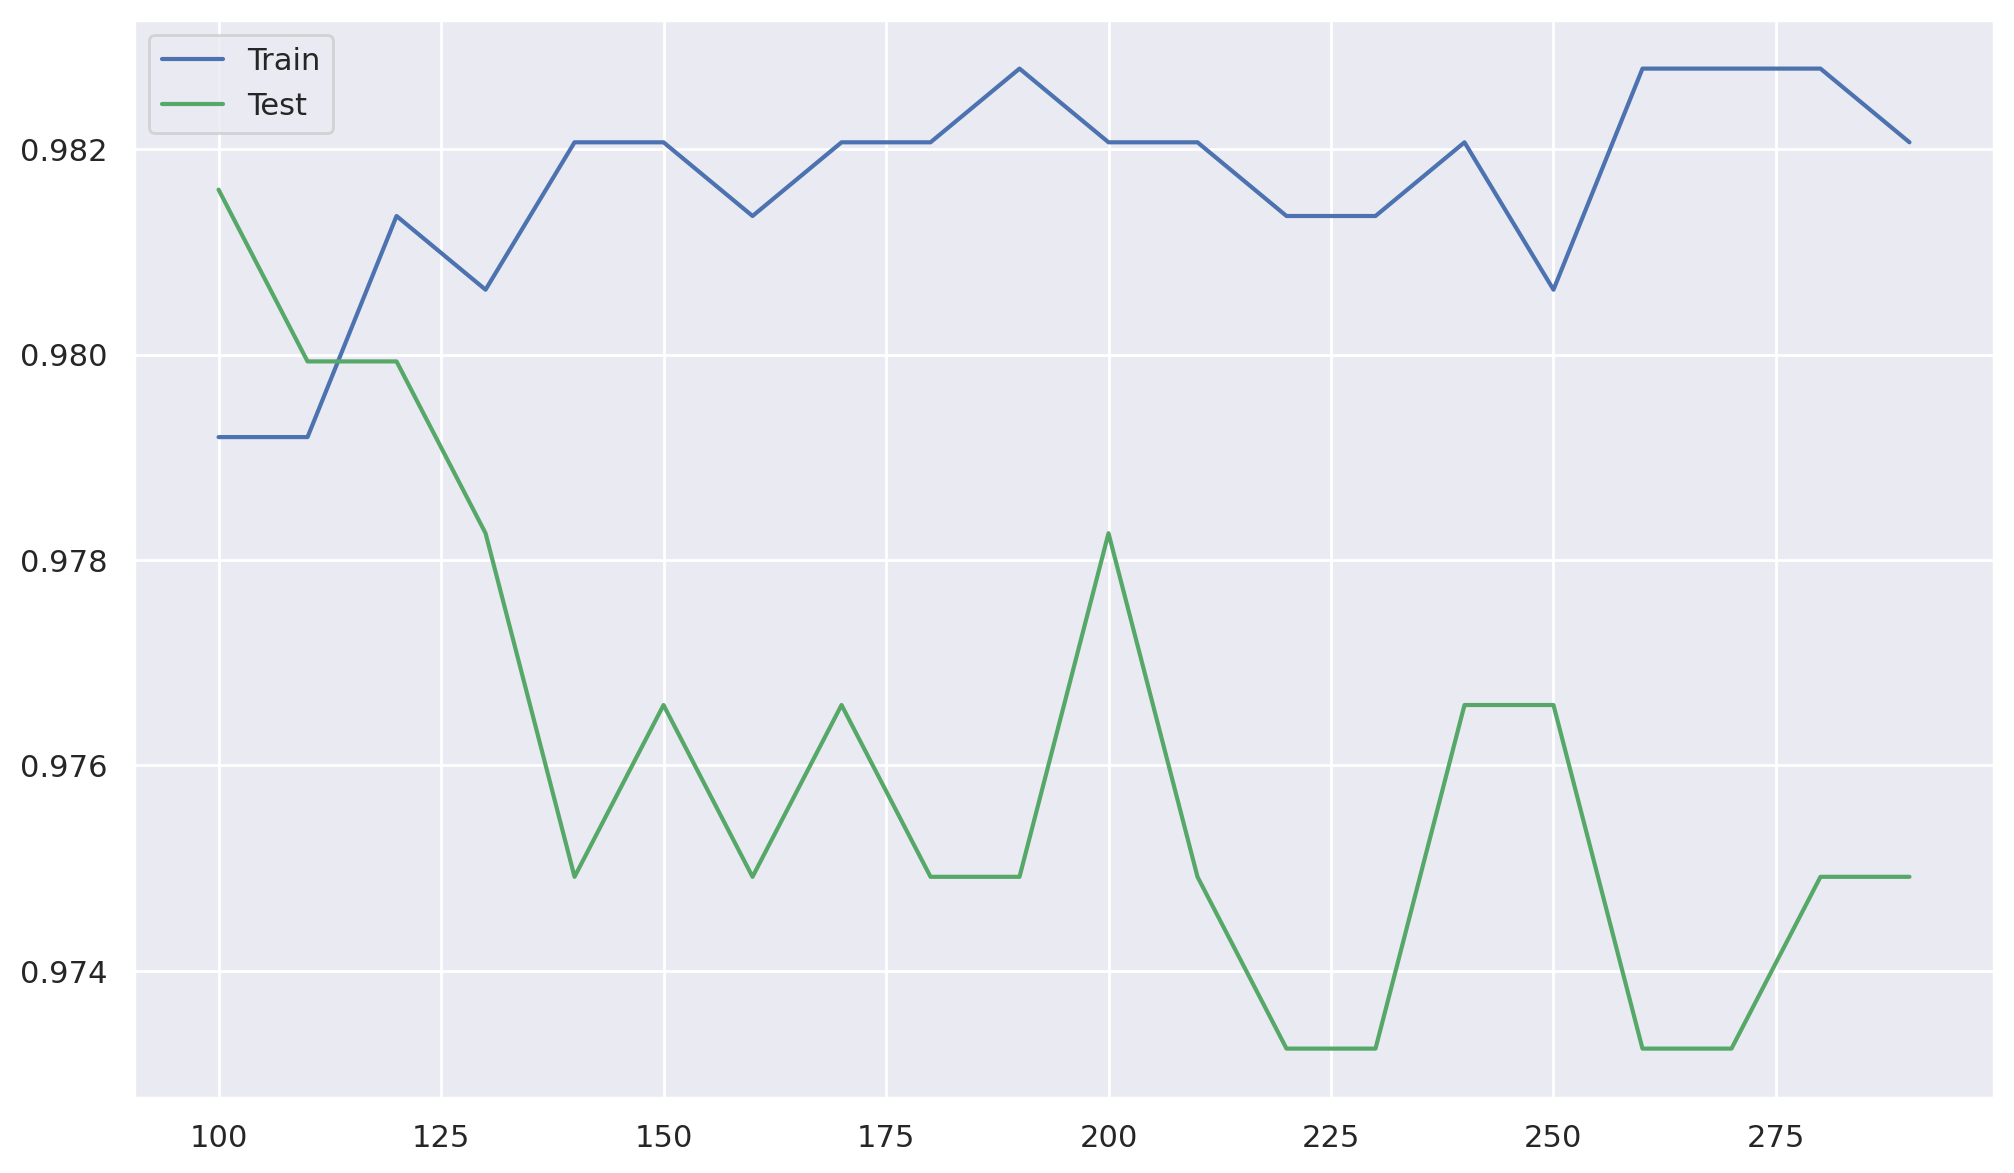

In [ ]:
start = 100
stop = 300
passo = 10

vEpochs = np.arange(start, stop, passo) # array con lista di valori crescenti per le epoche
vAccTrain = []  # lista dell'accuratezza sui dati di train
vAccTest = []  # lista dell'accuratezza sui dati di test

for e in vEpochs:
    mlp = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=e)
    mlp.fit(X_train_std, y_train)   
    vAccTrain.append(mlp.score(X_train_std, y_train))  # accuratezza sul training set
    vAccTest.append(mlp.score(X_test_std, y_test))  # accuratezza sul test set

# grafico dell'accuratezza 
import matplotlib.pyplot as plt
plt.plot(vEpochs, vAccTrain, c='b', label='Train')
plt.plot(vEpochs, vAccTest, c='g', label='Test')
plt.legend()

Questi valori partono da <kbd>start</kbd>, arrivano a <kbd>stop</kbd>, e aumentano di volta in volta di un <kbd>passo</kbd>. Quindi addestriamo un MLP per un massimo di epoche non superiore a ciascuno di questi valori e registriamo l’accuratezza sui dati di training e quelli di test in due liste <kbd>accTrain</kbd> e <kbd>accTest</kbd>, in modo da poter disegnare il loro grafico, con una linea blu per l’accuratezza con i dati di addestramento, verde per quelli di test.<br>
Dopo diversi <u>warning</u> di mancata convergenza, nella cella del nostro notebook, possiamo vedere il grafico dell’accuratezza.

Come possiamo osservare, dopo circa 115 epoche le previsioni migliorano nel training set, mentre peggiorano nel test set. Questo vuol dire che la rete ha iniziato a imparare a memoria. Per questo motivo proviamo a fermare l’addestramento dopo 115 iterazioni e vediamo i risultati.

In [ ]:
model01 = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=115)
model01.fit(X_train_std, y_train)
train_score01 = model01.score(X_train_std, y_train)
test_score01 = model01.score(X_test_std, y_test)
print(f"Accuratezza dati di TRAIN: {round(train_score01, 3)}")
print(f"Accuratezza dati di TEST: {round(test_score01, 3)}")
print(model01.predict([caso_std]))

Come ci aspettavamo dal grafico, l’accuratezza sui dati di addestramento è peggiorata leggermente, ma è migliorata sui dati di test. Inoltre il nostro mostriciattolo davanti al rover è sempre classificato come Simmy. <br>
In realtà il nostro modello è a rischio di overfitting perché il numero di nodi è troppo grande: ci sono troppi neuroni rispetto al numero di campioni, la rete tende a imparare a memoria i dati di addestramento. È possibile trovare una rete con prestazioni paragonabili, ma con meno neuroni o livelli.

<h3>Salvataggio del modello</h3>

In Python anche i modelli di machine learning sono oggetti, e tramite una procedura standard, detta serializzazione, possono essere salvati in memoria o in un file. Per poter utilizzare il nostro modello appena addestrato in altri programmi salviamo le caratteristiche del modello (livelli, numero di nodi, pesi dei nodi…) in un file binario con estensione <b>.joblib</b>, grazie alla libreria omonima: quando vorremo utilizzare il modello potremo recuperarlo senza doverlo addestrare di nuovo.

In [ ]:
from joblib import dump, load

#per esportare
dump(model01, 'marziani.joblib') 

#per importare
modelImportato = load('marziani.joblib') 
print(modelImportato.predict([caso_std]))

<h3>Per i regressori si utilizza il MAE</h3>

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test_std)
mae = mean_absolute_error(predictions, y_test) 
print(mae)